# **EEE3094S LAB 1**
## Travimadox Webb
## WBBTRA001



## **1.Step Test**
### **1.1 Data Collection**

A step input of magnitude '1' was applied to the system and data was recorded and plotted as shown below:
 

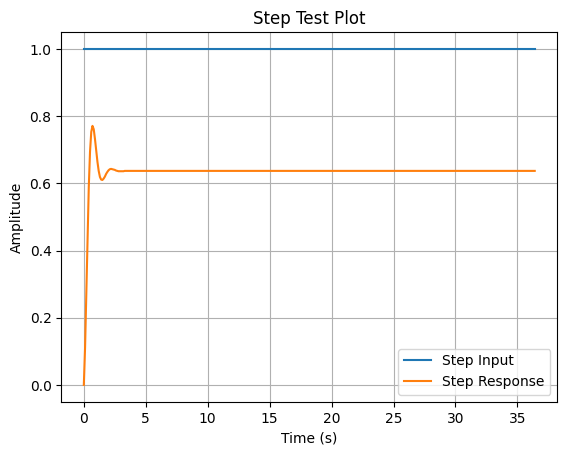

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import TransferFunction, step

# 1. Load the Data
data = pd.read_csv('Travimadox2.CSV')
time = data['Time(s)'].values
input_signal = data['Input'].values  

# Modify the output and time data so that they start at zero
first_output_value = data['Output_Displacement'].values[0]
output_displacement = data['Output_Displacement'].values - first_output_value

first_time_value = time[0]
time = time - first_time_value

# 2. Plotting the Original Data
plt.figure()
plt.plot(time, input_signal, label="Step Input")
plt.plot(time, output_displacement, label="Step Response")
plt.title('Step Test Plot')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

### **1.2 Step Data Analysis**


### **Methodology to Obtain System Parameters using Step Response**

A step response is a common approach to characterizing the behavior of a system. By analyzing the step response of a system, we can derive key parameters which define its behavior. Below, we outline the steps and the corresponding equations used to obtain the system parameters from the step response:

#### i. **System Gain**
The system gain (also known as steady-state gain) is defined as the value of the system's response as time approaches infinity. It's the value that the system's output settles to after a long time following a step input.

$$ \text{Gain} = \text{output\_displacement}[-1] $$

#### ii. **Peak Time and Peak Value**
The peak time ($ t_p $) is the time at which the step response reaches its maximum (peak) value.

$$ t_p = \text{time}[ \text{idx} ] $$
$$ \text{Peak Value} = \max(\text{output\_displacement}) $$

#### iii. **Percent Overshoot**
The percent overshoot ($ \text{\%OS} $) is a measure of how much the system's response overshoots its final steady-state value.

$$ \text{\%OS} = \frac{\text{Peak Value} - \text{Gain}}{\text{Gain}} \times 100 $$

#### iv. **Damping Ratio and Natural Frequency**
The damping ratio ($ \zeta $) and the natural frequency ($ \omega_n $) are critical parameters in defining the behavior of a second-order system. They can be derived from the percent overshoot and peak time:

$$ \zeta = \frac{-\ln(\text{\%OS} / 100)}{\sqrt{\pi^2 + \ln^2(\text{\%OS} / 100)}} $$
$$ \omega_n = \frac{\pi}{t_p \times \sqrt{1 - \zeta^2}} $$

#### v. **Transfer Function**
Using the system gain, damping ratio, and natural frequency, the transfer function of the system can be formulated. For a standard second-order system, the transfer function is given by:

$$ G(s) = \frac{\text{Gain} \times \omega_n^2}{s^2 + 2 \zeta \omega_n s + \omega_n^2} $$

The above methodology is implemented below and the step response and bode plotted from the obtained transfer function

In [2]:
# 3. Calculate System Gain
gain = output_displacement[-1]  # Steady-state value
print("System Gain: {}".format(gain))
print("\n")

# 4. Determine Peak Time and Peak Value
peak_value = np.max(output_displacement)
idx = np.argmax(output_displacement)
peak_time = time[idx]

# 5. Calculate Percent Overshoot
percent_overshoot = ((peak_value - gain) / gain) * 100

# 6. Compute Damping Ratio and Natural Frequency
zeta = (-np.log(percent_overshoot / 100)) / np.sqrt(np.pi**2 + np.log(percent_overshoot / 100)**2)
omega_n = np.pi / (peak_time * np.sqrt(1 - zeta**2))
print("Damping Ratio: {}".format(zeta));
print("\n")
print("Natural Frequency: {}".format(omega_n));

# 7. Create Transfer Function
num = [gain * omega_n**2]
den = [1, 2 * zeta * omega_n, omega_n**2]
system = TransferFunction(num, den)

t, y = step(system)



System Gain: 0.6369999999999996


Damping Ratio: 0.44450471510901357


Natural Frequency: 5.010166540846147


From the above it can be infered that:
$$ Gain \approx 0.637$$
$$  \zeta \approx 0.4445   $$
$$ \omega_n \approx 5.01 rad/s $$

Given the damping ratio and natural frequency, the poles  of the system can be determined using the quadratic equation:

$$ s^2 + 2 \zeta \omega_n s + \omega_n^2 = 0 $$

The poles of the system are at:

$$ s_1, s_2 = -\zeta \omega_n \pm \omega_n \sqrt{\zeta^2 - 1} $$

$$ s_1 = -2.227 + j4.487 $$

$$ s_2 =  -2.227 - j4.487 $$


The transfer function of the system from the above is then:

$$ G(s) = \frac{\text{Gain} \times \omega_n^2}{s^2 + 2 \zeta \omega_n s + \omega_n^2} $$

$$ G(s) = \frac{\text{0.637} \times 5.01^2}{s^2 + 2 \times 0.4445 \times 5.01 s + 5.01^2} $$

## **2.Frequency Response Test**

## **2.1 Data Collection**

Different sinusoidal inputs with an amplitude of 1 were applied to the system. To assess the system's response, we calculated both the gain and phase. Here's how they were determined:

**Gain**:  
$$ \text{Gain (dB)} = 20 \log\left(\frac{\text{Output Amplitude}}{\text{Input Amplitude}}\right) $$

**Phase**: 


$$ \Delta \phi = \left( \frac{\Delta t}{T} \right) \times 360^\circ $$
Where **T** is the period of the sinusoid

The gain and phase data was then used to plot bode plot as shown below:


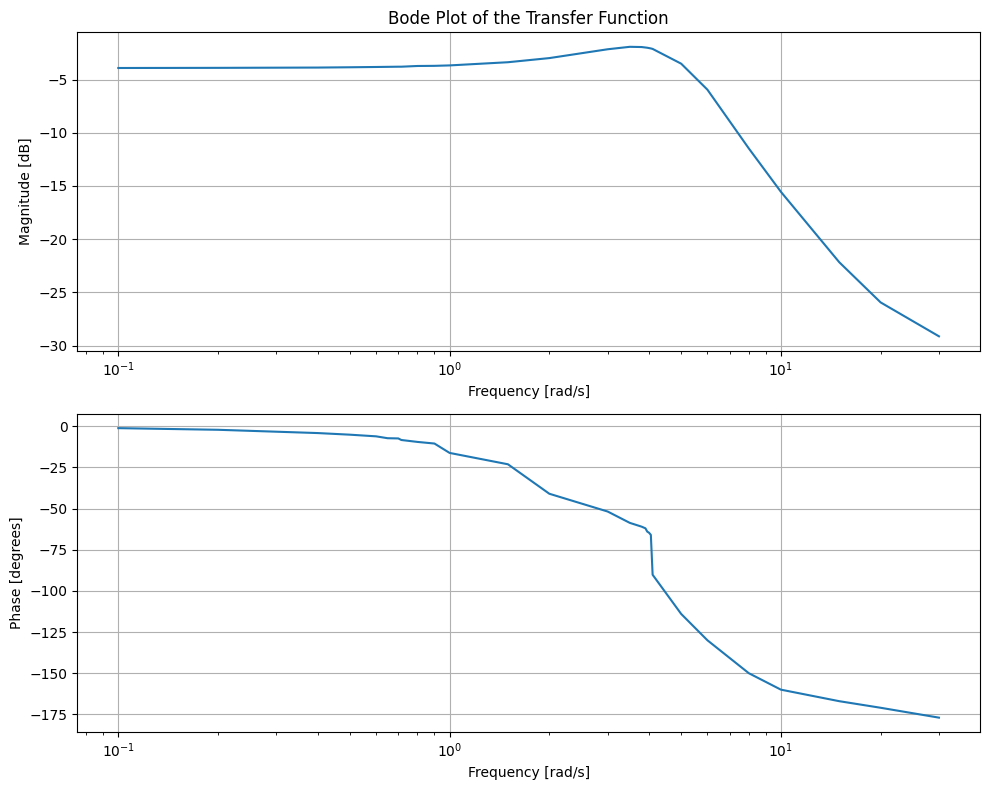

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



def compute_gain_amplitude(data):
    input_amplitude = (data["Input"].max() - data["Input"].min()) / 2
    output_amplitude = (data["Output_Displacement"].max() - data["Output_Displacement"].min()) / 2
    gain = output_amplitude / input_amplitude
    return gain

def extract_frequency_from_filename(filename):
    freq_str = filename.split("Sine")[1].split(".CSV")[0]
    frequency = float(freq_str)
    return frequency

folder_path = "FreqSweep"
csv_files = [f for f in os.listdir(folder_path) if f.startswith('Sine') and f.endswith('.CSV')]

#Calculated manually
phases = [-1.15,-2.15,-4.14,-5.12,-6.13,-7.27,-7.4,-8.35,-9.52,-10.5,-16.2,-23.1,-41,-51.8,-58.7,-61,-62,-64,-64.7,-66,-90.2,-114,-130,-150,-160,-167,-171,-177]

gains = []
frequencies = []

for csv_file in csv_files:
    frequency = extract_frequency_from_filename(csv_file)
    frequencies.append(frequency)

sorted_indices = np.argsort(frequencies)
frequencies = np.array(frequencies)[sorted_indices]

for idx in sorted_indices:
    csv_file = csv_files[idx]
    full_path = os.path.join(folder_path, csv_file)
    data = pd.read_csv(full_path)
    gain = compute_gain_amplitude(data)
    gains.append(gain)
    


gains = np.array(gains)
#print(frequencies)
#print(phases)
#print(gains)

# Convert gains to decibels
gains_dB = 20 * np.log10(gains)



# Create Bode plot
fig, ax = plt.subplots(2, 1, figsize=(10, 8))




# Plot Bode magnitude
plt.subplot(2, 1, 1)
plt.semilogx(frequencies, gains_dB)  # Bode magnitude plot
plt.title('Bode Plot of the Transfer Function')
plt.xlabel('Frequency [rad/s]')
plt.ylabel('Magnitude [dB]')
plt.grid()

# Plot Bode phase
plt.subplot(2, 1, 2)
plt.semilogx(frequencies, phases)  # Bode phase plot
plt.xlabel('Frequency [rad/s]')
plt.ylabel('Phase [degrees]')
plt.grid()

# Display the plot
plt.tight_layout()
plt.show()

## **3. System Model**

**Damping coefficient:**

$$ b =2\zeta \omega_n = 2 \times 0.4445 \times 5.01 = 4.454$$

**Spring coeffcient:**

$$ k = \omega_n^2 = 5.01^2 = 25.10$$

**Transfer Function:**

$$ G(s) = \frac{\text{0.637} \times 5.01^2}{s^2 + 2 \times 0.4445 \times 5.01 s + 5.01^2} $$

## **4.Validation**

### **4.1 Simulated vs. observed step response**


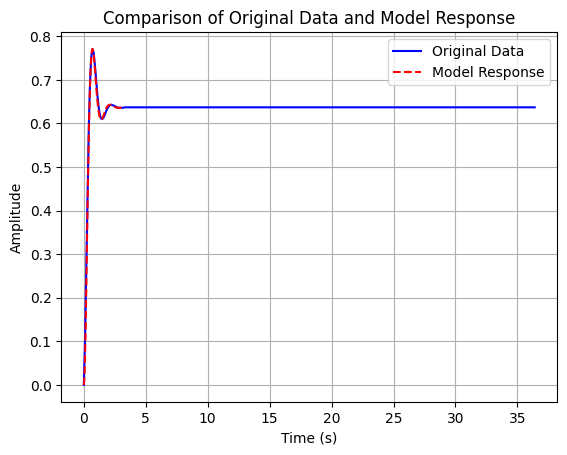

In [4]:
# 3. Calculate System Gain
gain = output_displacement[-1]  # Steady-state value


# 4. Determine Peak Time and Peak Value
peak_value = np.max(output_displacement)
idx = np.argmax(output_displacement)
peak_time = time[idx]

# 5. Calculate Percent Overshoot
percent_overshoot = ((peak_value - gain) / gain) * 100

# 6. Compute Damping Ratio and Natural Frequency
zeta = (-np.log(percent_overshoot / 100)) / np.sqrt(np.pi**2 + np.log(percent_overshoot / 100)**2)
omega_n = np.pi / (peak_time * np.sqrt(1 - zeta**2))

# 7. Create Transfer Function
num = [gain * omega_n**2]
den = [1, 2 * zeta * omega_n, omega_n**2]
system = TransferFunction(num, den)

t, y = step(system)

# 8. Plot System's Step Response
plt.figure()
plt.plot(time, output_displacement, 'b', label="Original Data")
plt.plot(t, y, 'r--', label="Model Response")
plt.title('Comparison of Original Data and Model Response')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

### **4.2 : Simulated vs. observed frequency response**

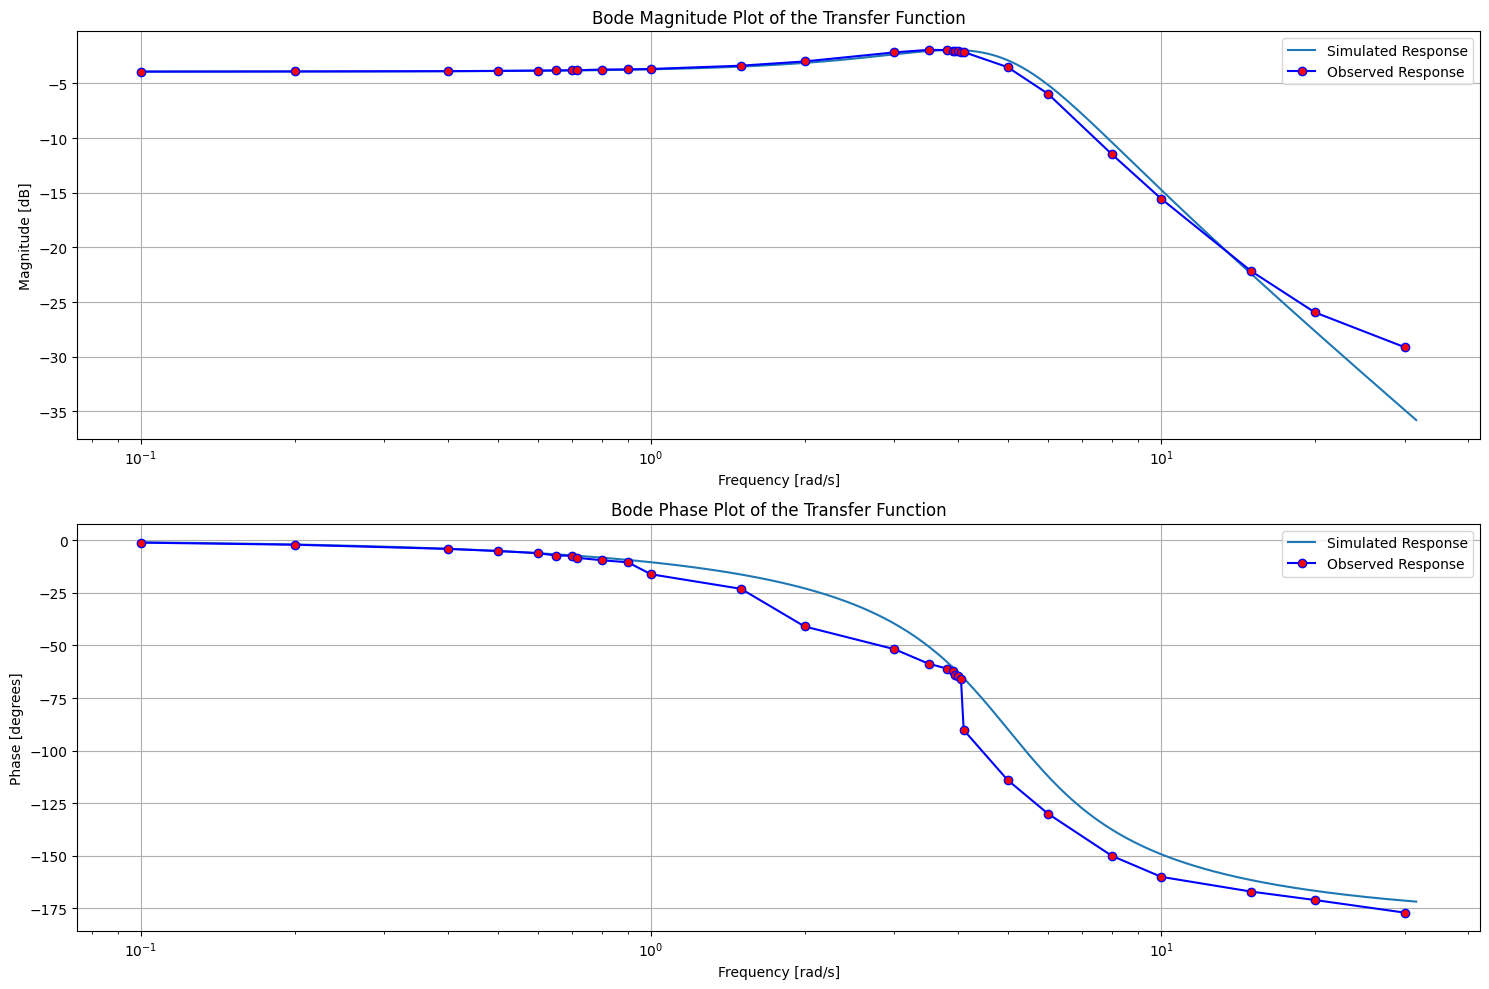

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import bode

# Create your custom frequency range
omega = np.logspace(-1, 1.5, 500)  # 500 points from 10^-1 to 10^2

# Compute Bode magnitude and phase data for the given frequency range
frequencies_scipy, magnitude_scipy, phase_scipy = bode(system, omega)

# Convert data table gains to decibels
gains_dB = 20 * np.log10(gains) # Assuming 'gains' is the magnitude from your data table

# Create a new figure for the Bode plot
plt.figure(figsize=(15, 10))

# Plot Bode magnitude
plt.subplot(2, 1, 1)
plt.semilogx(frequencies_scipy, magnitude_scipy, label='Simulated Response')
plt.semilogx(frequencies, gains_dB, 'o-', color='blue', markerfacecolor='red', label='Observed Response')
plt.title('Bode Magnitude Plot of the Transfer Function')
plt.xlabel('Frequency [rad/s]')
plt.ylabel('Magnitude [dB]')
plt.legend()
plt.grid()

# Plot Bode phase
plt.subplot(2, 1, 2)
plt.semilogx(frequencies_scipy, phase_scipy, label='Simulated Response')
plt.semilogx(frequencies, phases, 'o-', color='blue', markerfacecolor='red', label='Observed Response')
plt.title('Bode Phase Plot of the Transfer Function')
plt.xlabel('Frequency [rad/s]')
plt.ylabel('Phase [degrees]')
plt.legend()
plt.grid()

# Display the plot
plt.tight_layout()
plt.show()


## **4.3: Validation Analysis**

### **Step Response**
- The step response from our experiment matched perfectly with our predictions. This means our model seems accurate based on this test.

### **Bode Magnitude Plot**
- For lower frequencies (left of a certain point we call the system's "natural frequency"), our predicted and actual measurements were almost the same.
- For higher frequencies (right of the natural frequency), our predictions were a bit off compared to our actual measurements, especially at the very high frequencies.

### **Bode Phase Plot**
- Again, for lower frequencies, our predictions and measurements matched really well.
- For higher frequencies, there were some small differences. Our actual measurements showed slightly different phase values than our predictions, but the general shape was the same.

In short, our model works really well for lower frequencies, but there are some differences at higher frequencies that we might need to look into.